
# **Value at Risk (VaR) of Portfolios**

* **Bo Li** (30212597)
* **Brian Ho** (30222881)

# Definition

Risk management is a crucial (and often obligatory) component of the investment lifecycle. One of the most useful risk assessment measures is known as Value at Risk (VaR), which has been used by financial professionals for decades to quantify portfolio risk. In cryptocurrency markets, risk management remains a complex and evolving area of study due to frequent changes in market structure, high volatility, and limited availability of historical data. (Kenton 2023)


Value-at-Risk (VaR) is a quantitative tool used to measure the maximum potential loss in value of a portfolio of assets over a defined period for a given probability. Specifically, VaR construction requires a quantile estimate of the far-left tail of the unconditional returns distribution. Though widely-used as a risk measure in the past, standard methods of VaR construction assuming iid-ness and normality have come under criticism.

VaR can be viewed as an acceptable loss, given a confidence level, which makes it a particularly useful metric for compliance purposes as well as capital requirement planning. Since the VaR for different confidence levels exhaustively describes the investment profitability, it can be used for investment management, allowing us to define limit-order levels to crystallize profits or cut losses.

VaR is also well-used in risk-budgeting for optimizing the allocation of assets within a portfolio or for analyzing the impact of a trade on portfolio risk. In practice, this would involve only adding an asset to a portfolio if it keeps losses within the specified VaR parameters.

# Methods of Calculating VaR

There are three main ways of calculating Value at Risk (VaR) including parametric (historical) method, non-parametric (variance-covariance) method, and Monte Carlo simulation method.

## 1. Historical Method (Non-Parametric)

- Methodology: This method relies on historical returns to estimate VaR. It involves sorting historical returns, selecting the appropriate percentile corresponding to the desired confidence level, and using it as the VaR estimate (Manganelli & Engle, 2001).
- Advantages: It is simple to implement without any distributional assumptions, which captures only historical market behavior.
- Disadvantages: It may not capture future market conditions, sensitive to outliers and non-stationarity and requires a long history of data for reliable estimates.

## 2. The Variance-Covariance Method (Parametric)

- Methodology: This method assumes a specific distribution for asset returns, typically Normal distribution, and estimates the parameters of the distribution (mean and standard deviation) from historical data. VaR is then calculated based on the chosen distribution (Manganelli & Engle, 2001), with the formula:
$$
VaR = \mu + z*\sigma\\
\text{, where $\mu$ is the mean return, $z$ is the z-score at based on the level of confidence selected, and $\sigma$ is the standard deviation.}
$$

- Advantages: It allows modelling more complex portfolios that can incorporate additional statistical techniques, such as volatility clustering.
- Disadvantages: It relies on distributional assumptions which may not hold in all market conditions or porfolios, sensitive to model misspecification, and requires a large sample size for accurate parameter estimation.

## 3. Monte Carlo Simulation

- Methodology: This method involves simulating thousands or millions of possible future scenarios for asset returns based on historical data or assumed distributions. VaR is then estimated based on the distribution of simulated portfolio returns (Manganelli & Engle, 2001). For most users, a Monte Carlo simulation amounts to a "black box" generator of random, probabilistic outcomes. This technique requires the use of computational models to simulate projected returns over hundreds or thousands of possible iterations.(Team, 2022)
- Advantages: It is more flexible method that can capture complex dependencies and nonlinearities, providing insights into tail risks and extreme events.
- Disadvantages: It is computationally intensive, which requires careful modeling of correlations and dependencies, results can be sensitive to input assumptions.


# Application

VaR measures serve various purposes, including risk management, assessing the performance of risk-taking activities, and meeting regulatory obligations, as outlined by the Basel Committee on Banking Supervision in 1996. Financial institutions, including banks and investment firms, are required to adhere to capital requirements based on VaR estimates. Thus, the accuracy of these estimates is paramount. Failure to accurately assess underlying risks can result in inefficient capital allocation, impacting institutions' profitability and financial stability (Manganelli & Engle, 2001).

In this comprehensive project, our endeavor involves meticulously gathering data spanning from February 19th, 2019, to February 16th, 2024, encompassing three distinct datasets: fiat, crypto, and derivatives, collecting from Yahoo Finance and MarketWatch websites.

* Fiat: Daily colsing price of CNY(Chinese Yuan) and ARS (Argetina Pesso) comparing to USD
* Crypto: Daily colsing price of Bitcoin, Ethereum, and Doge Coin comparing to USD
* Derivatives (futures): Daily colsing price of E-Mini S&P 500 Future Continuous Contract and Crude Oil WTI (NYM $/bbl) Front Month Contract comparing to USD


Within the ambit of this project, we undertake a sophisticated simulation wherein we allocate an initial investment of $10,000 across all three portfolio sets, each with its distinct characteristics. Our methodology involves a meticulous comparison of outcomes across all portfolios employing three distinct analytical methods. Our overarching objective is to discern which portfolio harbors the least risk, denoted by the minimal loss in the Value at Risk (VaR) evaluation. Furthermore, we aim to scrutinize the nuances in outcomes across all three methods, discerning the disparities and elucidating the implications for prudent investment strategies.

## Packages

In [23]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

## Initial Portfolio

In [24]:
initial_amount = 10000 # initial investment of $10000
N = 7 # number of assets
# equal weight of each asset
# w = 1/7 for ARS, CNY, BTC, ETH, DOGE, SPXf and OILf respectively
w = np.array([1/N]*N)

## Historical Closing Price Data

The following historical data collected from Yahoo Finance and MarketWatch is used below for the computation of VaR through the three introduced methods. The extracted data includes the `Date` and `Close` (closing price) of each asset from February 19th, 2019, to February 16th, 2024.

In [25]:
# read the data from the csv files
ARS = pd.read_csv("https://raw.githubusercontent.com/bakkiuho/DATA609_project/main/ARSUSD%3DX.csv", 
                  usecols = ["Date", "Close"])
CNY = pd.read_csv("https://raw.githubusercontent.com/bakkiuho/DATA609_project/main/CNYUSD%3DX.csv", 
                  usecols = ["Date", "Close"])
BTC = pd.read_csv("https://raw.githubusercontent.com/bakkiuho/DATA609_project/main/BTC-USD.csv", 
                  usecols = ["Date", "Close"])
ETH = pd.read_csv("https://raw.githubusercontent.com/bakkiuho/DATA609_project/main/ETH-USD.csv", 
                  usecols = ["Date", "Close"])
DOGE = pd.read_csv("https://raw.githubusercontent.com/bakkiuho/DATA609_project/main/DOGE-USD.csv", 
                   usecols = ["Date", "Close"])
SPXf = pd.read_csv("https://raw.githubusercontent.com/bakkiuho/DATA609_project/main/FUTURE_US_XCME_ES00.csv", 
                   usecols = ["Date", "Close"])
OILf = pd.read_csv("https://raw.githubusercontent.com/bakkiuho/DATA609_project/main/FUTURE_US_XNYM_CL.1.csv", 
                   usecols = ["Date", "Close"])

In [26]:
# merge the fiat data into one dataframe
fiat = pd.DataFrame()
fiat["Date"] = ARS.Date
fiat["ARS"] = ARS.Close
fiat["CNY"] = CNY.Close
fiat.Date = pd.to_datetime(fiat.Date) # convert the date to datetime format
fiat = fiat.dropna() # drop all the missing values

# merge the crypto data into one dataframe
crypto = pd.DataFrame()
crypto["Date"] = BTC.Date
crypto["BTC"] = BTC.Close
crypto["ETH"] = ETH.Close
crypto["DOGE"] = DOGE.Close
crypto.Date = pd.to_datetime(crypto.Date) # convert the date to datetime format
crypto = crypto.dropna() # drop all the missing values

# merge the future data into one dataframe
future = pd.merge(SPXf, OILf, 
                  on = "Date", 
                  how = "inner").rename(columns = {"Close_x": "SPX_future", "Close_y": "OIL_future"})
future.Date = pd.to_datetime(future.Date) # convert the date to datetime format
future = future.dropna() # drop all the missing values

In [27]:
# merge the fiat, crypto and future dataframes into one dataframe
combine_price = pd.merge(fiat, crypto, on = "Date", how = "inner")
combine_price = pd.merge(combine_price, future, on = "Date", how = "inner")
combine_price.set_index("Date", inplace = True) # set the date as the index
combine_price.head()

,ARS,CNY,BTC,ETH,DOGE,SPX_future,OIL_future
Date,,,,,,,
2019-02-19,0.025829,0.147804,3947.094482,145.346191,0.002067,2778.7,56.09
2019-02-20,0.025466,0.147979,3999.820557,149.554337,0.002079,2787.0,56.92
2019-02-21,0.025212,0.148803,3954.118164,146.130844,0.002028,2774.2,56.96
2019-02-22,0.025305,0.148829,4005.526611,149.092453,0.002056,2791.2,57.26
2019-02-25,0.025350,0.148960,3882.696289,139.822861,0.002030,2797.1,55.48


## Compute historical returns

Since the datasets contain only the closing prices, the daily returns (percentage changes) are derived from the price data. As the parametric and Monte-Carlo methods assume a Normal distribution of returns, log returns are preferred for the calulation of VaR below.

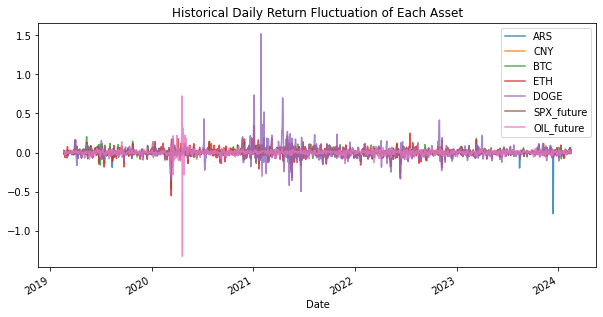

In [28]:
# calculate the daily returns
# percentage change between the current and prior closing price
returns = combine_price.pct_change(1).dropna() 

# calculate the log returns
logreturns = np.log(1 + returns)

# plot the historical daily return fluctuation of each asset
logreturns.plot(figsize = [10, 5], alpha=0.8)
plt.title("Historical Daily Return Fluctuation of Each Asset")
plt.show()

From above plot we can see that "oil_future", and "ARS" both had significant negative fluctuation respectively while "Doge" had substaintial positive spike in the begining of 2021. If we trace further, we'll see all outstanding changes are aligned with impactful events during the time as below:

- In the first half of 2020, responses to the COVID-19 pandemic led to steep declines in global petroleum demand and to volatile crude oil markets. The second half of the year was characterized by relatively stable prices as demand began to recover. As petroleum demand fell and U.S. crude oil inventories increased, West Texas Intermediate (WTI) crude oil traded at negative prices on April 20, the first time the price for the WTI futures contract fell to less than zero since trading began in 1983.(Crude Oil Prices Briefly Traded below 0 in Spring 2020 but Have since Been Mostly Flat - Today in Energy - U.S. Energy Information Administration (EIA), n.d.)

- Dogecoin hit an all-time high of 0.07376 in May 2021. At its peak, these 100 investments in Dogecoin based on Musk's tweets would have been worth 28,902.86 and 23,916.68 respectively. (News and Insights, 2021)

- Argentina's peso opened down 54.24% at 801 per dollar on Wednesday, following a devaluation of the currency carried out by the country's new government as part of its economic shock therapy aimed at fixing the economy.(Hur, 2023)

## 1. Historical Method (Non-Parametric)

Using the historical method, the daily VaR of fiat, cryptocurrency and future portfolios at 99% confidence is calculated respectively for the analysis and comparison between the potential risks of the three portfolios with the same initial amount of investment ($\$10000$) and equal weight for each asset in the portfolio. With equal weight $w = [w_1, w_2, ..., w_N]$, the daily returns of each portfolio are calculated by applying the weights to the past observations of the asset returns in the portfolio. The daily VaR at 99% level of confidence is then derived from the 1st percentile of the historical portfolio returns distribution.

### Fiat Money Portfolio

In [29]:
# VaR at 99% confidence level (1st percentile)
w_fiat = np.array([0.5, 0.5]) # equal weight of ARS and CNY
# calculate the daily returns of fiat portfolio
PnL_fiat = np.sum(w_fiat*logreturns[["ARS", "CNY"]], axis=1) 
# calculate the 1st percentile of the daily returns based on historical distribution
var_historical_fiat = np.percentile(PnL_fiat, 1, method = "lower") 
var_fiat = abs(var_historical_fiat*initial_amount)
print(f"The daily VaR of fiat portfolio at 99% confidence: ${var_fiat:.2f}")

The daily VaR of fiat portfolio at 99% confidence: $122.95


### Cryptocurrency Portfolio

In [30]:
# VaR at 99% confidence level (1st percentile)
w_crypto = np.array([1/3, 1/3, 1/3]) # equal weight of BTC, ETH and DOGE
# calculate the daily returns of crypto portfolio
PnL_crypto = np.sum(w_crypto*logreturns[["BTC", "ETH", "DOGE"]], axis=1)
# calculate the 1st percentile of the daily returns based on historical distribution
var_historical_crypto = np.percentile(PnL_crypto, 1, method = "lower")
var_crypto = abs(var_historical_crypto*initial_amount)
print(f"The daily VaR of crypto portfolio at 99% confidence: ${var_crypto:.2f}")

The daily VaR of crypto portfolio at 99% confidence: $1379.40


### Future Portfolio

In [31]:
# VaR at 99% confidence level (1st percentile)
w_future = np.array([0.5, 0.5]) # equal weight of SPX_future and OIL_future
# calculate the daily returns of future portfolio
PnL_future = np.sum(w_future*logreturns[["SPX_future", "OIL_future"]], axis=1)
# calculate the 1st percentile of the daily returns based on historical distribution
var_historical_future = np.percentile(PnL_future, 1, method = "lower")
var_future = abs(var_historical_future*initial_amount)
print(f"The daily VaR of future portfolio at 99% confidence: ${var_future:.2f}")

The daily VaR of future portfolio at 99% confidence: $502.57


### Comparison on Potential Risk between Portfolios

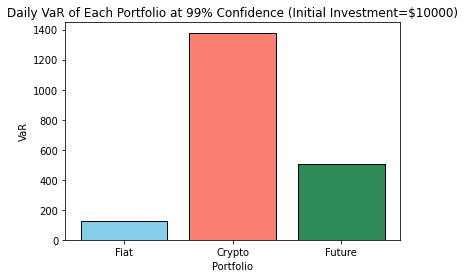

In [32]:
# plot the historical daily VaR of each portfolio
var_historical = pd.DataFrame()
var_historical["Portfolio"] = ["Fiat", "Crypto", "Future"]
var_historical["VaR"] = [var_fiat, var_crypto, var_future]

plt.bar(var_historical.Portfolio, var_historical.VaR, 
        color = ["skyblue", "salmon", "seagreen"], 
        edgecolor = "black")
plt.xlabel("Portfolio")
plt.ylabel("VaR")
plt.title("Daily VaR of Each Portfolio at 99% Confidence (Initial Investment=$10000)")
plt.show()

Based on our findings, we observe that the crypto portfolio has the highest risk loss among all three portfolio with daily potential loss of about $\$1400$, where the fiat portfolio has the lowest daily VaR of about $\$120$ with 99\% confidence. This result aligns with our expectation that fiat is relatively more stable and less risky, while the price movements of cryptocurrency are more fluctuated, with a potential daily loss of approximately $\frac{1400}{10000} = 14\%$ of the initial portfolio.

### Full Portfolio

The full portfolio with all the fiat, crypto and future assets is also investigated, and the daily VaRs of this portfolio derived from the three different methods are compared and discussed.

In [33]:
# VaR at 99% confidence level (1st percentile)
PnL = np.sum(w*logreturns, axis=1) # calculate the daily returns of full portfolio
# calculate the 1st percentile of the daily returns based on historical distribution
var_historical_portfolio = np.percentile(PnL, 1, method = "lower")
var_hist = abs(var_historical_portfolio*initial_amount) # historical VaR
print(f"The daily VaR of full portfolio at 99% confidence: ${var_hist:.2f}")

The daily VaR of full portfolio at 99% confidence: $680.00


Regarding the portfolio with all 7 assets evenly weighted, the daily VaR calculated by historical method is $680.00.

## 2. Variance-Covariance Method (Parametric)

Before calculating the VaR using parametric method, the historical return distribution is checked, since this method assumes a Normal distribution of returns.

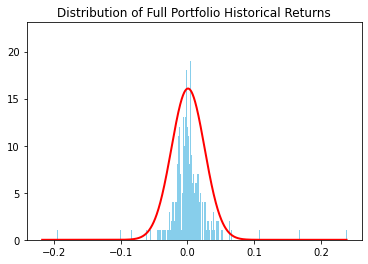

In [34]:
# plot the histogram of the full portfolio historical returns
plt.hist(PnL, bins = len(PnL), color = "skyblue") 
# create a sequence of numbers from the minimum to the maximum of the full portfolio historical returns
x = np.linspace(min(PnL), max(PnL), 1000) 
plt.plot(x, norm.pdf(x, PnL.mean(), PnL.std()), 'r-', lw=2) # plot the normal distribution curve
plt.title("Distribution of Full Portfolio Historical Returns")
plt.show()

As the distribution of full portfolio returns tends to be Normal, we assume that it follows a Normal distribution and meets the assumption of the parametric method. Next, the full portfolio average return and standard deviation are computed for the derivation of VaR. To obtain the portfolio average return, the weights of each asset in the current portfolio are applied to the historical return data of the corresponding asset. By computing the covariance matrix of assets in the portfolio, the portfolio standard deviation can be calculated using the formula,

$$
\begin{aligned}
\sigma = \sqrt{wCw^T} \text{, where weight } w = [w_1, w_2, ..., w_N] \text{ and C is the covariance matrix.}
\end{aligned}
$$

In [35]:
# average return of each asset
m = logreturns.mean()
# covariance matrix
C = logreturns.cov()
# portfolio average return
muv = m@w.T
print(f"The portfolio average return: {muv*100:.2f}%")
# portfolio standard deviation
sigmav = np.sqrt(w@C@w.T)
print(f"The portolio standard deviation: {sigmav*100:.2f}%")

The portfolio average return: 0.08%
The portolio standard deviation: 2.48%


Using the formula:
$$
VaR = \mu + z_{0.01}*\sigma
$$

In [36]:
# VaR at 99% confidence level (1st percentile)
var_portfolio = muv - sigmav*norm.ppf(0.99) # assumed Normal distribution
var_cov_portfolio = norm.ppf(0.01, muv, sigmav) 
var_param = abs(var_cov_portfolio*initial_amount) # parametric (variance-covariance) VaR
print(f"The daily VaR of full portfolio at 99% confidence: ${var_param:.2f}")

The daily VaR of full portfolio at 99% confidence: $569.47


Regarding the portfolio with all 7 assets evenly weighted, the daily VaR using Variance-Covariance Method will be $569.47.

## 3. Monte Carlo Simulation

Simulation is performed for each asset in the portfolio, where the daily returns are simulated from Normal distribution. Thus, the distribution of each asset is checked below.

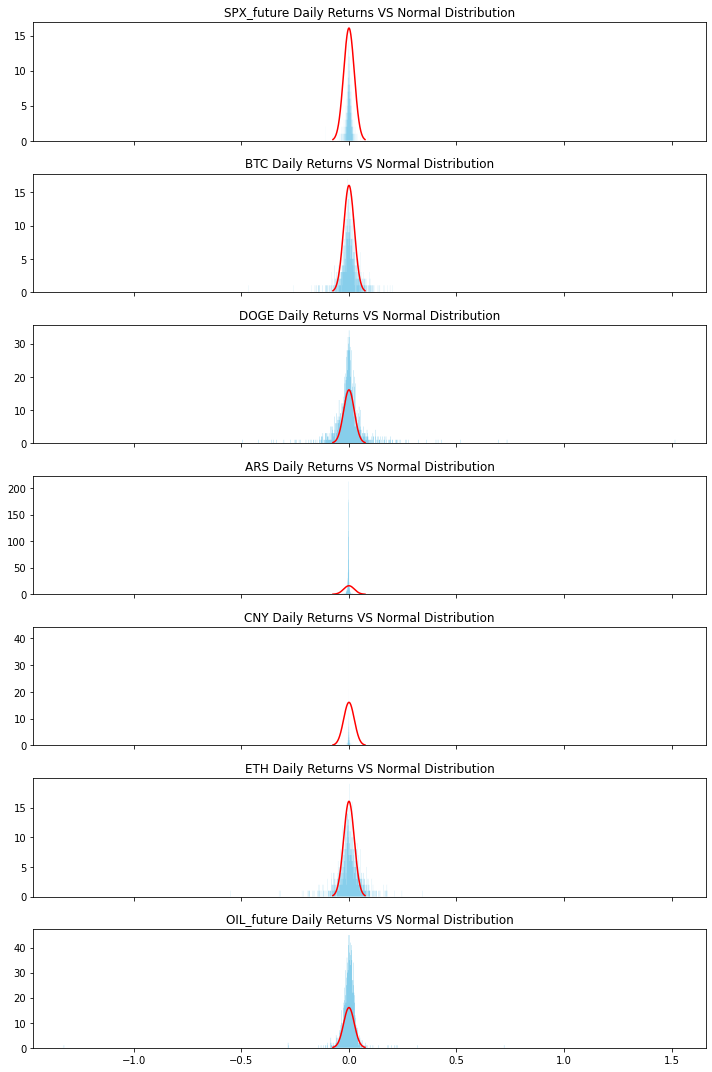

In [37]:
# check the distribution of each asset
assets = {"ARS", "CNY", "BTC", "ETH", "DOGE", "SPX_future", "OIL_future"}
fig, axs = plt.subplots(len(assets), 1, figsize=(10, 15), sharex=True) # create a grid of subplots
for i, asset in enumerate(assets): 
    # plot the histogram of the historical returns
    axs[i].hist(logreturns[asset], bins = len(logreturns), histtype = "stepfilled", color = "skyblue") 
    # create a sequence of numbers from the minimum to the maximum of the historical returns
    x = np.linspace(muv - 3*sigmav, muv + 3*sigmav,len(logreturns[asset])) 
    axs[i].plot(x, norm.pdf(x, muv, sigmav), "r") # plot the normal distribution curve
    axs[i].set_title("{} Daily Returns VS Normal Distribution".format(logreturns[asset].name))
plt.tight_layout() # adjust the subplots to fit into the figure area
plt.show()

The distribution of each asset return looks to be Normal, therefore, we assume they are Normally distributed, and the return simulations below are derived from Normal distribution. By calculating the historical avearge return of each asset $m = [\mu_1, \mu_2, ..., \mu_7]$, and the corresponding standard deviation $sd = [\sigma_1, \sigma_2, ..., \sigma_7]$, 10000 return scenarios for the 7 assets in the portfolio are simulated from Normal distribution with the calculated average returns and standard deviations.

In [42]:
# set the number of simulations as 10000
num_simulations = 10000
# standard deviation of each asset return
sd = logreturns.std()
# simulate 10000 return scenarios for 7 assets
rng = np.random.default_rng(42) # set the random seed
returns_sim = rng.normal(m, sd, size=(num_simulations, N)) # simulate returns from Normal distribution
returns_sim.shape

(10000, 7)

In [44]:
# compute simulated portfolio returns
PnL_sim = np.sum(returns_sim*w, axis=1) 
 # calculate the 1st percentile of the simulated portfolio returns
var_montecarlo_portfolio = np.percentile(PnL_sim, 1, method = "lower")
var_montecarlo = abs(var_montecarlo_portfolio*initial_amount) # Monte Carlo VaR
print(f"The daily VaR of full portfolio at 99% confidence: ${var_montecarlo:.2f}")

The daily VaR of full portfolio at 99% confidence: $413.60


Regarding the portfolio with all 7 assets evenly weighted, the daily VaR using Monte-Carlo Method will be $413.60.

# Conclusion

Based on our findings, the three methods provides a daily VaR of the portfolio in the range from roughly $\$400$ to $\$700$, implying a potential maximum daily loss within this range, with a 99% level of confidence.

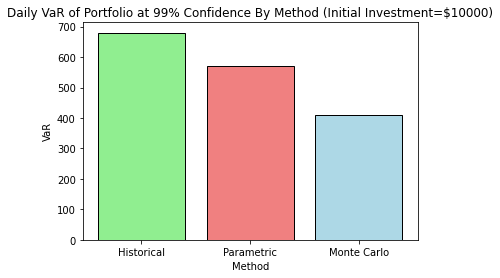

In [40]:
# plot the distribution of simulated portfolio returns
var_all = pd.DataFrame()
var_all["Method"] = ["Historical", "Parametric", "Monte Carlo"]
var_all["VaR"] = [var_hist, var_param, var_montecarlo]

plt.bar(var_all.Method, var_all.VaR, 
        color = ["lightgreen", "lightcoral", "lightblue"], 
        edgecolor = "black")
plt.xlabel("Method")
plt.ylabel("VaR")
plt.title("Daily VaR of Portfolio at 99% Confidence By Method (Initial Investment=$10000)")
plt.show()

- Based on our data exploration and method testing, we conclude that the crypto portfolio is considered as the highest risk.

- The fiat portfolio on the contrary, is considered with the lowest risk with the least max loss amount.

- Comparing all three VaR computing methods for portfolio with investment in all 7 assets evenly, Monte Carlo Simulation provides the least max loss amount and Historical Method's outcome with the most max loss amount.

In overall, given the noticeable difference between the VaR values of the three methods, there is no universally the "best" method for calculating VaR, as each method has its strengths and limitations. The choice of method depends on factors such as the availability of data, the complexity of the portfolio, the desired level of accuracy, and the specific characteristics of the risk being assessed. In practice, it's often useful to use multiple methods and compare the results to gain a more comprehensive understanding of the portfolio's risk profile. Additionally, sensitivity analysis and stress testing can help assess the robustness of VaR estimates under different modeling assumptions.

# References

ARS/USD (ARSUSD=X) Live Rate, Chart & News - Yahoo Finance. (2024). @YahooFinance. https://finance.yahoo.com/quote/ARSUSD%3DX/history

‌Bitcoin USD (BTC-USD) Price History & Historical Data - Yahoo Finance. (2024). @YahooFinance. https://finance.yahoo.com/quote/BTC-USD/history

CNY/USD (CNYUSD=X) Live Rate, Chart & News - Yahoo Finance. (2024). @YahooFinance. https://finance.yahoo.com/quote/CNYUSD%3DX/history

‌‌Crude oil prices briefly traded below $0 in spring 2020 but have since been mostly flat - Today in Energy - U.S. Energy Information Administration (EIA). (n.d.). Www.eia.gov. https://www.eia.gov/todayinenergy/detail.php?id=46336

Crude Oil WTI (NYM $/bbl) Front Month. (2024). MarketWatch. https://www.marketwatch.com/investing/future/cl.1?mod=futures-market-data

Dogecoin USD (DOGE-USD) Price History & Historical Data - Yahoo Finance. (2024). @YahooFinance. https://finance.yahoo.com/quote/DOGE-USD/history

‌Ethereum USD (ETH-USD) Price History & Historical Data - Yahoo Finance. (2024). @YahooFinance. https://finance.yahoo.com/quote/ETH-USD/history

‌Hur, K. (2023). Argentina to devalue peso by over 50% as part of emergency economic reforms | CNN Business. CNN. https://www.cnn.com/2023/12/12/economy/argentina-milei-peso-dollar/index.html

E-Mini S&P 500 Future Continuous Contract. (2024). MarketWatch. https://www.marketwatch.com/investing/future/es00?mod=futures-market-data

Manganelli, S., & Engle, R. (2001). E U R O P E A N C E N T R A L B A N K VALUE AT RISK MODELS IN FINANCE. https://www.ecb.europa.eu/pub/pdf/scpwps/ecbwp075.pdf

News and Insights. (2021). Nasdaq.com. https://www.nasdaq.com/articles/if-you-invested-

Kenton, Will. 2023. “Value at Risk (VaR) Explained.” Investopedia. March 23, 2023. https://www.investopedia.com/terms/v/var.asp.

‌Team, W. (2022). Value At Risk. WallStreetMojo. https://www.wallstreetmojo.com/value-at-risk/

‌Yahoo Finance. (2024). @YahooFinance. https://finance.yahoo.com/

‌
